In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (100, 2)
dimensions de y: (100, 1)


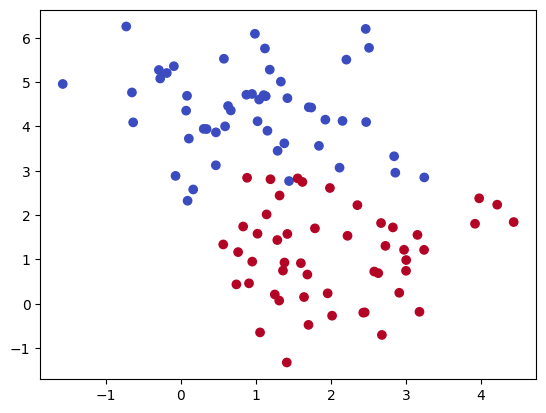

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

In [3]:
def initialisation(X):
    """Initialisation des paramètres W et b de la régression logistique"""
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    """Retourne la fonction d'activation de la couche de sortie"""
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A,y):
    """Retourne la log loss"""
    return -np.mean(y*np.log(A+ 1e-5) + (1-y)*np.log(1-A+ 1e-5))

In [6]:
def gradients(A, X, y):
    """Retourne les gradients de la log loss par rapport à W et b"""
    dW = 1 / len(y) * np.dot(X.T, A - y)  # dérivée de la log loss par rapport à W, voir formulaire pdf
    db = np.mean(A - y) # dérivée de la log loss par rapport à b, voir formulaire pdf
    return (dW, db)

    

In [7]:
def update(dW, db, W, b, alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return (W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b) # activation (sorties du réseau de neurones)
    return A>=0.5

In [9]:
def artificial_neural_network(X, y, learning_rate=0.01, n_iter=1000):
    # Initialisation des paramètres
    W, b = initialisation(X)

    history = []
    Loss = []
    

    # Boucle d'apprentissage
    for i in range(n_iter):
        # Forward
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        # Backward
        dW, db = gradients(A, X, y)
        # Mise à jour des paramètres
        W, b = update(dW, db, W, b, learning_rate)
        history.append((W, b, Loss, i))
    
    y_pred = predict(X, W, b)
    print("Accuracy:" , accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return W, b, history # retourne les paramètres appris

Accuracy: 0.92


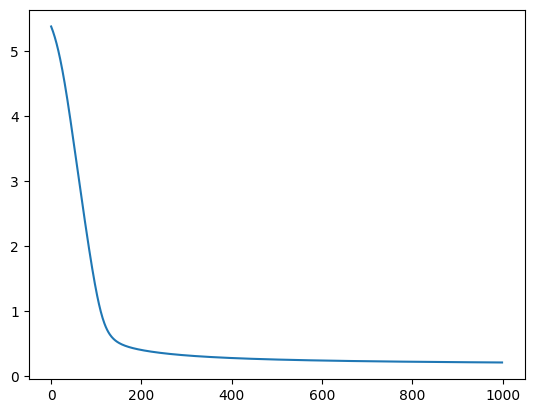

In [10]:
# courbe d'apprentissage
W, b, history = artificial_neural_network(X, y)


Les erreurs décroissent, l'apprentissage fonctionne. La fonction de coût converge.

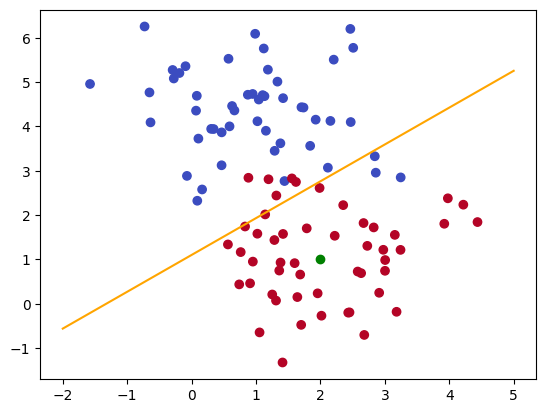

array([ True])

In [11]:
# frontière de décision est le point où la probabilité de la fonction d'activation est de 0.5
# donc on cherche le point où W1*x1 + W2*x2 + b = 0

x1 = np.linspace(-2, 5, 100)
x2 = -(W[0]*x1 + b) / W[1]
plt.plot(x1, x2, c='orange')


new_plant = np.array([2,1]) # nouvelle plante à prédire
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.scatter(new_plant[0], new_plant[1], c='green')
plt.show()
predict(new_plant, W, b)


In [12]:
import plotly.graph_objects as go

In [13]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:,0].flatten(),
    y=X[:,1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(), 
        colorscale='Viridis',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0) ,title="Données")
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


In [14]:
X0 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
X1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0]*xx0 + W[1]*xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='Viridis', opacity=0.8, reversescale=True)]))

fig.add_scatter3d(x=X[:,0].flatten(), y=X[:,1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='Viridis', opacity=0.9, reversescale=True))

fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0), title="Frontière de décision")
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [15]:
def animate(params, ax):
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]

    ax[0].clear()
    ax[1].clear()
    ax[2].clear()

    s = 300
    # frontière de décision
    ax[0].scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=s, edgecolor='k', linewidth=3)

    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()

    x1 = np.linspace(-3, 6, 100)
    x2 = -(W[0]*x1 + b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)

    ax[0].set_xlim(X[:,0].min(), X[:,0].max())
    ax[0].set_ylim(X[:,1].min(), X[:,1].max())
    ax[0].set_title("Frontière de décision")
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")

    # sigmoid
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='purple', edgecolor='k', linewidth=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='yellow', edgecolor='k', linewidth=3, s=s)
    # ax[1].vlines(0, 0, 1, color='red', linestyle='--') # seuil de décision
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title("Sigmoid")
    ax[1].set_xlabel("Z")
    ax[1].set_ylabel("A(Z)")

    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j],ymin=0, ymax= 1/(1+np.exp(-z[y==0][j])), color='red', alpha=0.5, zorder=-1)

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j],ymax=0,ymin= 1/(1+np.exp(-z[y==1][j])), color='red', alpha=0.5, zorder=-1)

    ax[2].plot(range(i), loss[:i], c="red", lw=4)
    ax[2].set_xlim(loss[-1]*0.8,len(loss))
    ax[2].set_ylim(0, loss[0]*1.1)
    ax[2].set_xlabel("Itérations")
    ax[2].set_title("Fonction coût")
    ax[2].set_ylabel("Log Loss")


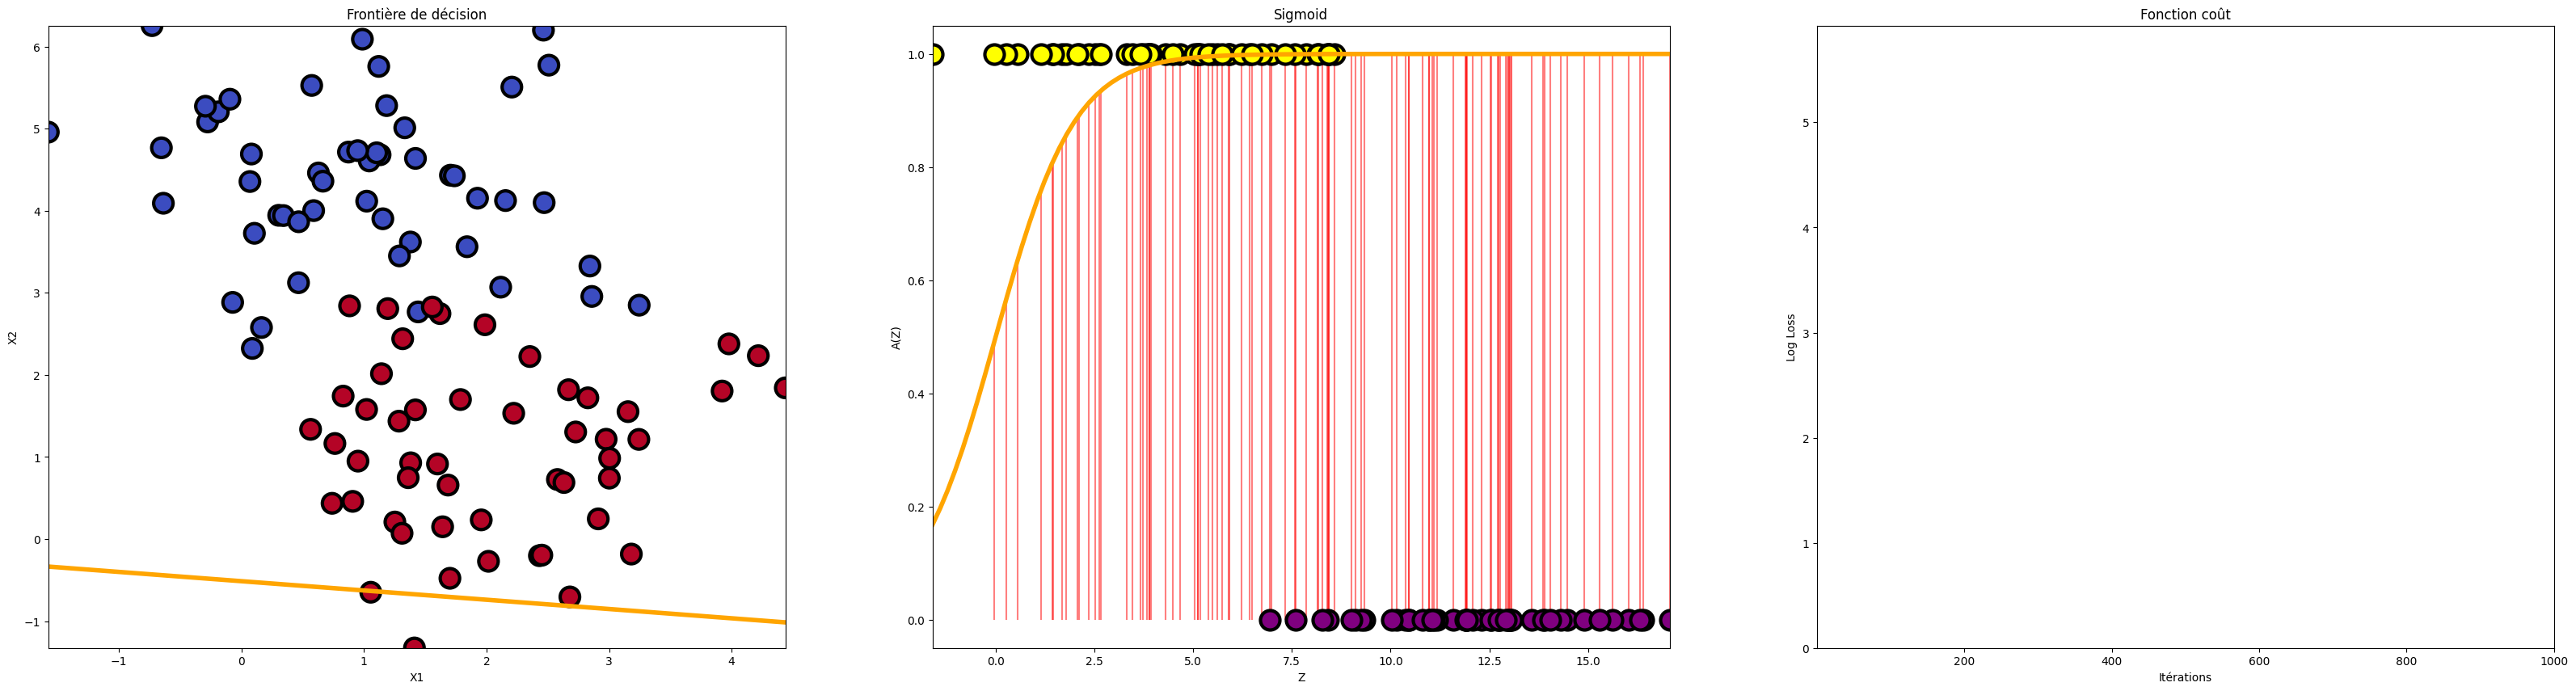

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(1, 3, figsize=(40, 10))
plt.rcParams['animation.ffmpeg_path'] = r'D:\Applications\ffmpeg-7.0.1-essentials_build\bin\ffmpeg.exe'
ani = FuncAnimation(fig, animate, frames=history, fargs=(ax,), interval=200, repeat=False)



Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=3200)
ani.save('neural_network.mp4', writer=writer)